In [15]:
! gdown --id 1QPn5WNRVUAtowSAgkw8ZuR3IZf_pxIdu

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QPn5WNRVUAtowSAgkw8ZuR3IZf_pxIdu
To: /content/IMDB_Dataset.csv
100% 66.2M/66.2M [00:00<00:00, 175MB/s]


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
dataset = pd.read_csv("IMDB_Dataset.csv")

In [20]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply the vectorizer to the text data
vectors = vectorizer.fit_transform(dataset["review"])

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(vectors, dataset["sentiment"], test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create instances of the models
logreg = LogisticRegression()
naive_bayes = MultinomialNB()

# Train the logistic regression model
logreg.fit(X_train, y_train)

# Train the naive Bayes model
naive_bayes.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MultinomialNB()

Accuracy of logistic regression: 0.9003
Accuracy of naive bayes: 0.8638


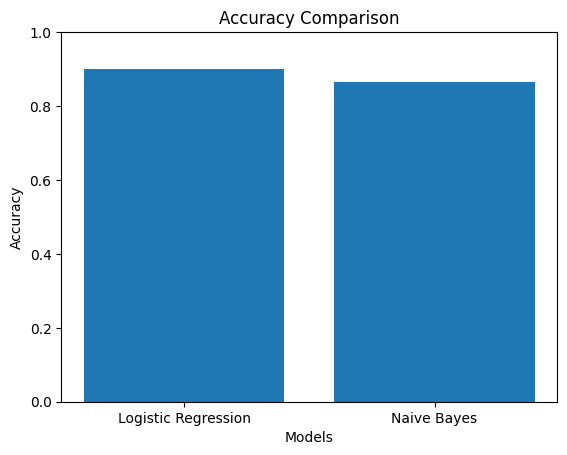

In [24]:
import matplotlib.pyplot as plt

# Make predictions on the test data
logreg_preds = logreg.predict(X_test)
naive_bayes_preds = naive_bayes.predict(X_test)

# Calculate accuracies
logreg_accuracy = accuracy_score(y_test, logreg_preds)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_preds)

# Create a bar chart to compare the accuracies
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [logreg_accuracy, naive_bayes_accuracy]

print(f'Accuracy of logistic regression: {logreg_accuracy}')
print(f'Accuracy of naive bayes: {naive_bayes_accuracy}')

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.title('Accuracy Comparison')
plt.show()

F1 score of logistic regression: 0.9003
F1 score of naive bayes: 0.8637999999999999


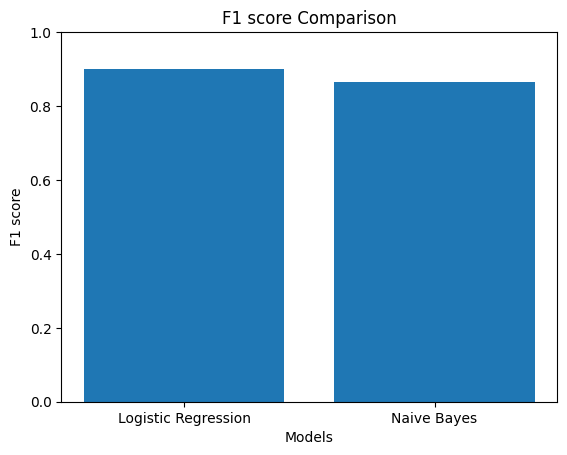

In [25]:
from sklearn.metrics import f1_score

# Calculate f1
logreg_f1 = f1_score(y_test, logreg_preds, average='micro')
naive_bayes_f1 = f1_score(y_test, naive_bayes_preds, average='micro')

print(f'F1 score of logistic regression: {logreg_f1}')
print(f'F1 score of naive bayes: {naive_bayes_f1}')

# Create a bar chart to compare the accuracies
models = ['Logistic Regression', 'Naive Bayes']
f_1s = [logreg_f1, naive_bayes_f1]

plt.bar(models, f_1s)
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.ylim([0.0, 1.0])
plt.title('F1 score Comparison')
plt.show()